In [56]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() ## this is for styling
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [57]:
df=pd.read_csv("Indian automoble buying behavour study 1.0.csv")

In [58]:
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [59]:
df.rename(columns={'Marrital Status':'Marital Status'},inplace=True)
df.rename(columns={'Personal loan':'Car_Loan'},inplace=True)
df.rename(columns={'Price':'EV_Price'},inplace=True)

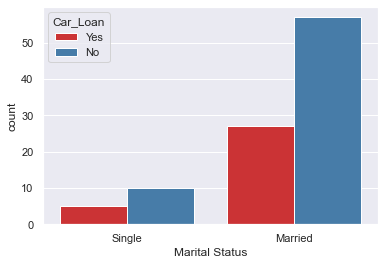

In [60]:
sns.countplot(x ='Marital Status', hue = 'Car_Loan',  data = df, palette = 'Set1')
plt.show()
     

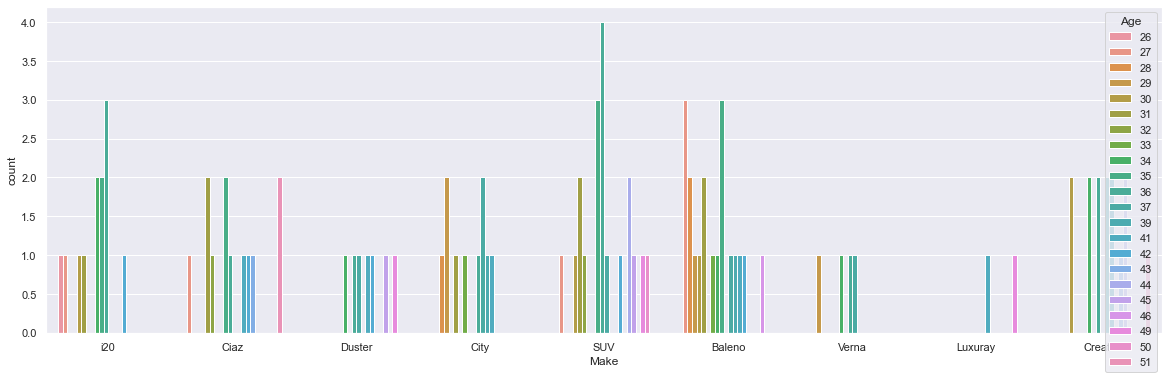

In [61]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="Age")

In [62]:
AgeGroup={}
length=df.shape[0]
AgeGroup['25-30']=round(df[(df['Age']>=25)&(df['Age']<30)].shape[0]*100/length,2)
AgeGroup['30-35']=round(df[(df['Age']>=30)&(df['Age']<35)].shape[0]*100/length,2)
AgeGroup['35-40']=round(df[(df['Age']>=35)&(df['Age']<40)].shape[0]*100/length,2)
AgeGroup['40-45']=round(df[(df['Age']>=40)&(df['Age']<45)].shape[0]*100/length,2)
AgeGroup['45-50']=round(df[(df['Age']>=45)&(df['Age']<50)].shape[0]*100/length,2)
AgeGroup['50-55']=round(df[(df['Age']>=50)&(df['Age']<55)].shape[0]*100/length,2)
AgeGroup['55+']=round(df[df['Age']>=55].shape[0]/length,2)

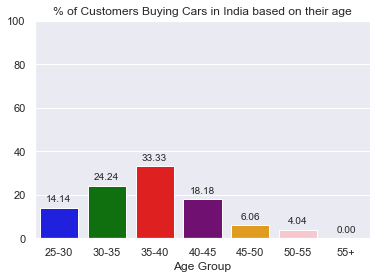

In [63]:
fig,ax=plt.subplots()
custom_colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink']
plots = sns.barplot(x=list(AgeGroup.keys()), y=list(AgeGroup.values()), palette=custom_colors)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
ax.set_ylim(0,100)
plt.title('% of Customers Buying Cars in India based on their age')
plt.xlabel('Age Group')
plt.show()

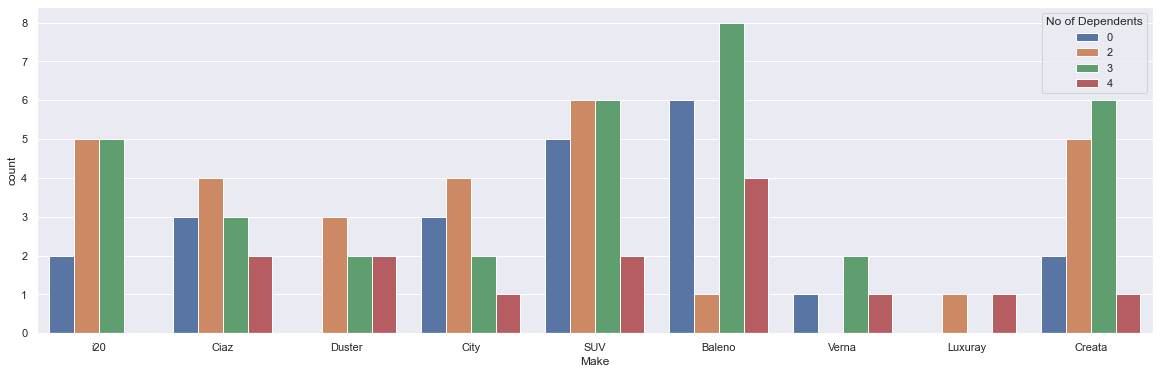

In [64]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="No of Dependents")

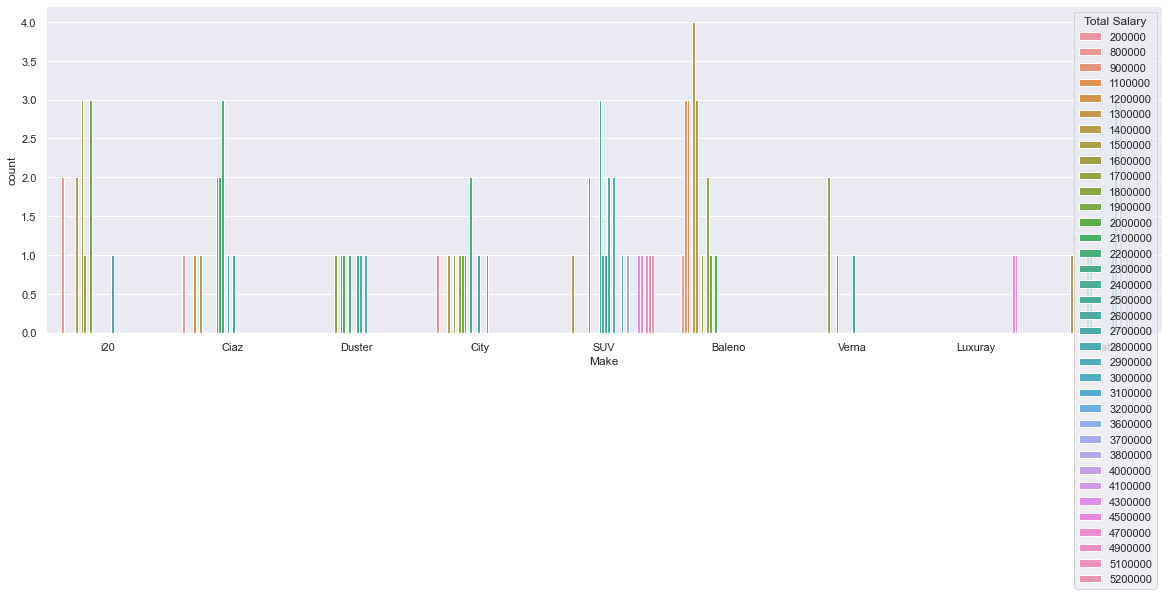

In [65]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="Total Salary")

In [66]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
selected_features = [
    "Age",
    "Profession",
    "Marital Status",
    "Education",
    "No of Dependents",
    "Salary",
]

# Create a DataFrame with only the selected features
data = df[selected_features]
# Apply label encoding to the 'Category' column
for i in selected_features[1:-1]:
    data[i] = label_encoder.fit_transform(data[i])
data.head()

,Age,Profession,Marital Status,Education,No of Dependents,Salary
0,27,1,1,1,0,800000
1,35,1,0,1,1,1400000
2,45,0,0,0,3,1800000
3,41,0,0,1,2,1600000
4,31,1,0,1,1,1800000


In [67]:
df.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,EV_Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


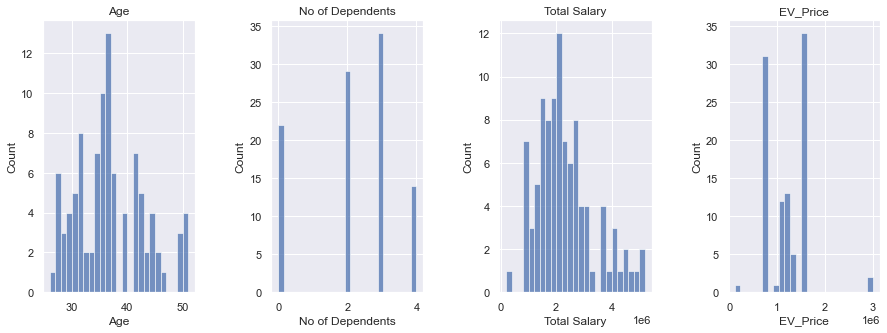

In [68]:
plt.figure(1, figsize=(15,5))
n=0

for x in ['Age', 'No of Dependents' ,'Total Salary'  ,'EV_Price']:
  n += 1
  plt.subplot(1,4,n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.histplot(df[x], bins= 25)
  plt.title(f'{x}')
plt.show()

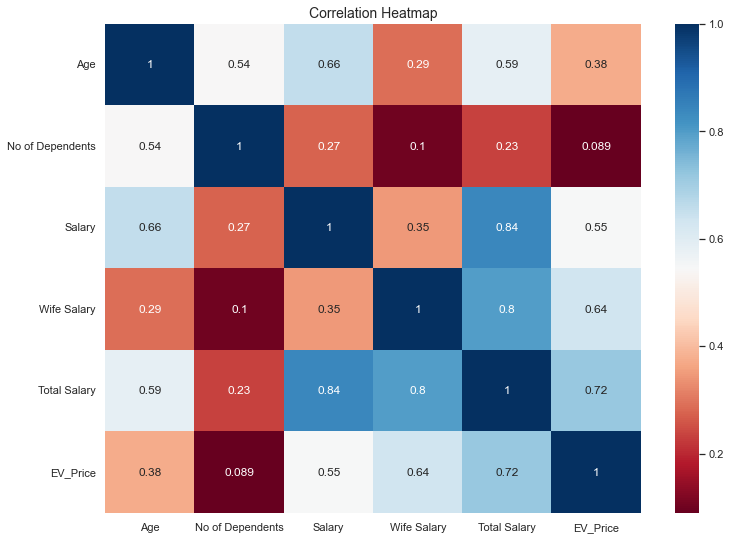

In [69]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),annot=True,cmap='RdBu')
plt.title('Correlation Heatmap',fontsize=14)
plt.yticks(rotation =0)
plt.show()

In [70]:
scaler = StandardScaler()
data['Salary'] = scaler.fit_transform(data[['Salary']])
df_std=data

In [71]:
df_std

,Age,Profession,Marital Status,Education,No of Dependents,Salary
0,27,1,1,1,0,-1.397118
1,35,1,0,1,1,-0.501877
2,45,0,0,0,3,0.094950
3,41,0,0,1,2,-0.203464
4,31,1,0,1,1,0.094950
...,...,...,...,...,...,...
94,27,0,1,0,0,0.990190
95,50,1,0,1,2,3.079085
96,51,0,0,0,1,0.691777
97,51,1,0,1,1,1.437811


Text(0, 0.5, 'Cumulative Explained Variance')

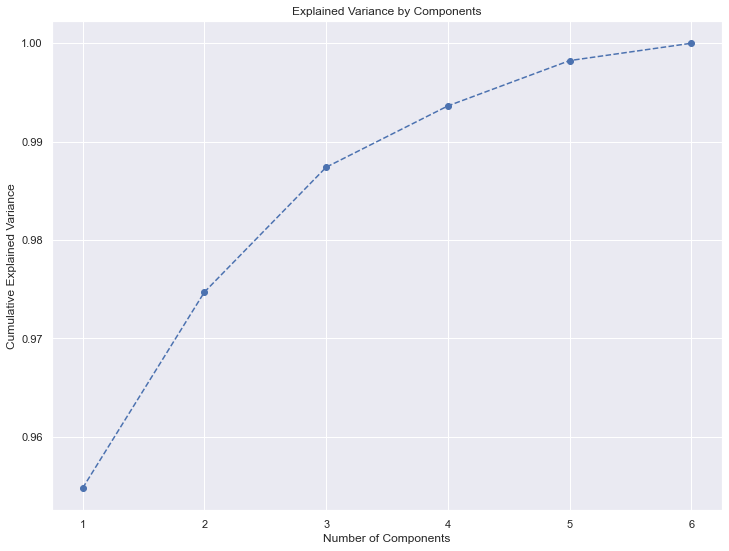

In [72]:

#PCA with K-Means for Better Visualization
#What we will do here is apply dimensionality reduction to simplify our problem.

#We will choose reasonable components in order to obtain a better clustering solution than with the standard K-Means. So that We aim to see a nice and clear plot for our segmented groups.

pca = PCA()
pca.fit(df_std) 

plt.figure(figsize = (12,9))
plt.plot(range(1,7), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')



In [73]:
pca = PCA(n_components = 3)
pca.fit(df_std)
pca.components_



array([[ 9.90835880e-01, -7.97207043e-05, -3.17544429e-02,
         5.90176561e-03,  7.72829175e-02,  1.05964275e-01],
       [-2.17429817e-02, -1.31425931e-01, -1.26216884e-01,
        -5.60372116e-02,  8.65491147e-01, -4.62718781e-01],
       [-1.28991887e-01,  2.19747693e-01, -6.92222066e-02,
         9.18675572e-02,  4.72756365e-01,  8.35668655e-01]])

In [74]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = data.columns,
              index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_comp


,Age,Profession,Marital Status,Education,No of Dependents,Salary
Component 1,0.990836,-0.000080,-0.031754,0.005902,0.077283,0.105964
Component 2,-0.021743,-0.131426,-0.126217,-0.056037,0.865491,-0.462719
Component 3,-0.128992,0.219748,-0.069222,0.091868,0.472756,0.835669


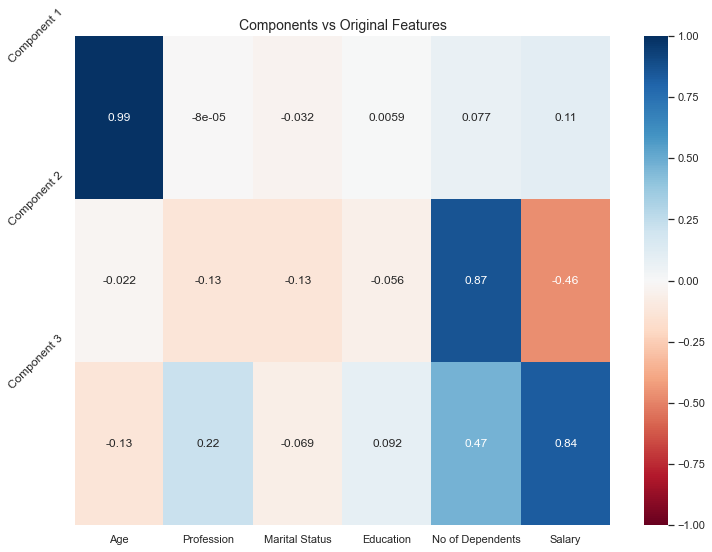

In [75]:

plt.figure(figsize=(12,9))
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2], 
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 12)
plt.title('Components vs Original Features',fontsize = 14)
plt.show()


pca.transform(df_std)
scores_pca = pca.transform(df_std)

In [76]:
scores_pca

array([[-9.50874552e+00, -5.44112894e-01, -5.71121519e-01],
       [-1.37815761e+00, -1.40593310e-01, -3.12953613e-01],
       [ 8.74218732e+00,  1.28425925e+00, -4.70225381e-01],
       [ 4.67584148e+00,  5.87784346e-01, -5.84521452e-01],
       [-5.27825879e+00, -3.29784446e-01,  7.01763551e-01],
       [-8.32168055e+00,  1.27833975e+00,  3.47441379e-01],
       [-5.22445823e+00,  1.87147965e+00,  8.07284298e-01],
       [-3.20518382e+00,  1.76530088e+00,  6.70795197e-01],
       [-2.11948443e+00,  1.32931330e+00,  1.28992774e+00],
       [-2.32923351e+00,  9.40759562e-01, -5.24477275e-02],
       [-1.23940236e+00,  1.65942975e+00,  5.07871713e-01],
       [-1.22949354e+00,  1.64642620e+00,  5.40691560e-01],
       [-7.47950874e+00, -5.30422739e-01, -6.35195681e-01],
       [-6.36401173e+00, -2.66693551e-02,  4.30359201e-02],
       [-5.34909319e+00,  1.34453673e+00, -2.59281974e-01],
       [ 1.28220270e+01,  5.26538818e-01,  1.98234153e-01],
       [-1.04995814e+01, -5.22369913e-01

In [77]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

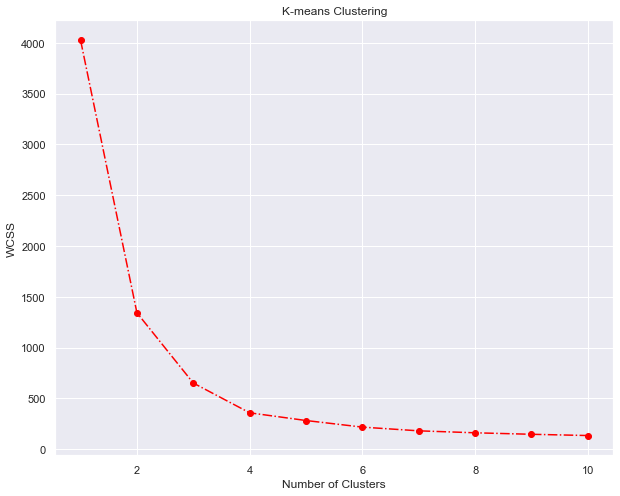

In [78]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [79]:
kmeans_pca = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans_pca.fit(scores_pca)




KMeans(n_clusters=3, random_state=42)

In [87]:
km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
#
# Fit the KMeans model
#
km.fit_predict(scores_pca)
#
# Calculate Silhoutte Score
#
score = silhouette_score(scores_pca, km.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.578


In [42]:

df_segm_pca_kmeans = pd.concat([df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']

df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_segm_pca_kmeans.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,Component 1,Component 2,Component 3,Segment K-means PCA
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000,-9.508746,-0.544113,-0.571122,0
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000,-1.378158,-0.140593,-0.312954,2
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000,8.742187,1.284259,-0.470225,1
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000,4.675841,0.587784,-0.584521,1
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000,-5.278259,-0.329784,0.701764,0


In [47]:
# We calculate the means by segments.
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,
0,29.310345,0.827586,1.241379e+06,258620.689655,1.500000e+06,1.024483e+06,-7.097103,-0.320039,-0.157803
1,44.464286,2.964286,2.342857e+06,660714.285714,3.003571e+06,1.407143e+06,8.220697,-0.098491,-0.008997
2,35.714286,2.595238,1.673810e+06,640476.190476,2.314286e+06,1.169048e+06,-0.580084,0.286640,0.114958


In [48]:

df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'Young Singles with Moderate Income', 
                                1:'Established Families with High Income',2:'MIddle-Aged Families with Moderate Income'})
df_segm_pca_kmeans_freq


,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,
Young Singles with Moderate Income,29.310345,0.827586,1.241379e+06,258620.689655,1.500000e+06,1.024483e+06,-7.097103,-0.320039,-0.157803
Established Families with High Income,44.464286,2.964286,2.342857e+06,660714.285714,3.003571e+06,1.407143e+06,8.220697,-0.098491,-0.008997
MIddle-Aged Families with Moderate Income,35.714286,2.595238,1.673810e+06,640476.190476,2.314286e+06,1.169048e+06,-0.580084,0.286640,0.114958


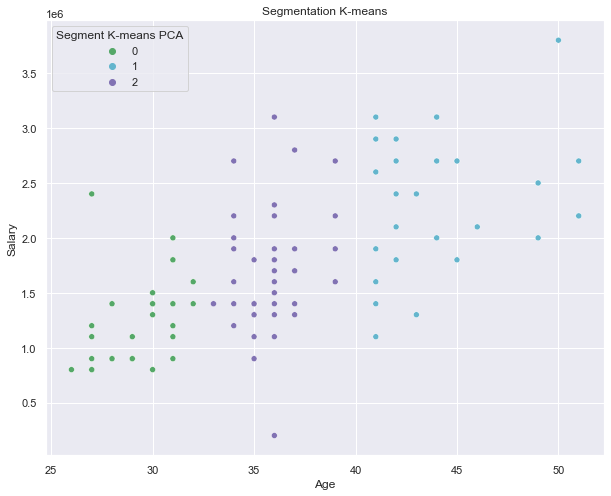

In [55]:
x_axis = df_segm_pca_kmeans['Age']
y_axis = df_segm_pca_kmeans['Salary']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment K-means PCA'], palette = ['g', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()